#Anime que virou Jogo

##Quais desses animes em nossa base de dados viraram jogos ??? Vamos realizar essa analise com duas bases de dados diferentes.

###vamos utilizar uma biblioteca diferente chamada ploty para externar os graficos em html

#Passo a passo
- instalar bibliotecas
- importar as ferramentas e framework usuais
- criar um dataset unico para as bases de dados
- filtrar colunas de interresse
- limpar dados vazios
- relacionar animes e jogos por titulos
- verificar o mais famoso ou o que mais temos de variações de jogos


##instalando bibliotecas

In [19]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##importar as ferramentas e framework usuais

In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

##criar um dataset unico para as bases de dados

In [31]:
anime = pd.read_csv('/content/sample_data/Anime.csv')
game = pd.read_csv('/content/sample_data/computer_games.csv')
game.rename(columns = {'Name':'Title'}, inplace = True)
anime.rename(columns = {'Start_Aired':'Date Released'}, inplace = True)
display(anime)
display(game)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Date Released,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21455,45064,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo,Unknown,小公主艾薇拉与神秘王国,Princess and the Kingdom,Unknown,Movie,1.0,Finished Airing,"May 12, 2018",...,Unknown,Kids,78.0,G - All Ages,NaN,NaN,160892.0,21487,7,0
21456,45065,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2,Unknown,小公主艾薇拉与神秘王国2,Avera and the Mystical Kingdom 2,Unknown,Movie,1.0,Finished Airing,"Aug 22, 2020",...,Unknown,Kids,80.0,G - All Ages,NaN,NaN,160902.0,21488,6,0
21457,45059,Yongzhe Chuang Mo Cheng,Unknown,勇者闯魔城,Brave City,Unknown,Movie,1.0,Finished Airing,"Mar 16, 2018",...,Unknown,Unknown,80.0,G - All Ages,NaN,NaN,164032.0,21489,6,0
21458,45063,Yu Shen Chuan: Wangzhe Shaonian,Unknown,禹神传之王者少年,The Juvenile of King Yu,Unknown,Movie,1.0,Finished Airing,"Aug 15, 2018",...,Unknown,Unknown,90.0,G - All Ages,NaN,NaN,164462.0,21490,6,0


,Title,Developer,Producer,Genre,Operating System,Date Released
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015"
1,A-Train,Artdink,"Artdink, Maxis, Ocean Software",Vehicle Simulation Game,"Windows, Mac",1985
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac","November 30, 1996"
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,"September 6, 1996"
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996
...,...,...,...,...,...,...
1090,688(I) Hunter/Killer,Sonalysts Inc.,Electronic Arts,Submarine simulator,Microsoft Windows,"July 4, 1997"
1091,7 Colors,Gamos Ltd.,Infogrames,Strategy,"Amiga, DOS",1991
1092,7554,Emobi Games,Emobi Games,First-person shooter,Microsoft Windows,"December 16, 2011"
1093,7th Legion,"Vision, Epic MegaGames",MicroProse,RTS,Microsoft Windows,"September 30, 1997"


In [40]:
anime_game = pd.concat([anime,game],ignore_index=False)
display(anime_game)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Date Released,...,Score,Scored_Users,Ranked,Popularity,Members,Favorites,Developer,Producer,Genre,Operating System
0,16498.0,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,8.531,519803.0,1002.0,1.0,3524109.0,155695.0,NaN,NaN,NaN,NaN
1,1535.0,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,8.621,485487.0,732.0,2.0,3504535.0,159701.0,NaN,NaN,NaN,NaN
2,5114.0,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,9.131,900398.0,12.0,3.0,2978455.0,207772.0,NaN,NaN,NaN,NaN
3,30276.0,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,8.511,19066.0,1112.0,4.0,2879907.0,59651.0,NaN,NaN,NaN,NaN
4,11757.0,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,7.201,990254.0,29562.0,5.0,2813565.0,64997.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,NaN,688(I) Hunter/Killer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"July 4, 1997",...,NaN,NaN,NaN,NaN,NaN,NaN,Sonalysts Inc.,Electronic Arts,Submarine simulator,Microsoft Windows
1091,NaN,7 Colors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991,...,NaN,NaN,NaN,NaN,NaN,NaN,Gamos Ltd.,Infogrames,Strategy,"Amiga, DOS"
1092,NaN,7554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"December 16, 2011",...,NaN,NaN,NaN,NaN,NaN,NaN,Emobi Games,Emobi Games,First-person shooter,Microsoft Windows
1093,NaN,7th Legion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"September 30, 1997",...,NaN,NaN,NaN,NaN,NaN,NaN,"Vision, Epic MegaGames",MicroProse,RTS,Microsoft Windows


##filtrar colunas de interresse

In [49]:
anime_game = anime_game[['Title','Date Released','Ranked']]
display(anime_game)
anime_game1 = anime_game.sort_values(["Ranked"], axis=0,ascending=True, inplace=False)
display(anime_game1)

,Title,Date Released,Ranked
2,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009",12.0
260,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Apr 9, 2022",22.0
336,Gintama°,"Apr 8, 2015",32.0
12,Steins;Gate,"Apr 6, 2011",42.0
27,Shingeki no Kyojin Season 3 Part 2,"Apr 29, 2019",52.0
...,...,...,...
1090,688(I) Hunter/Killer,"July 4, 1997",NaN
1091,7 Colors,1991,NaN
1092,7554,"December 16, 2011",NaN
1093,7th Legion,"September 30, 1997",NaN


,Title,Date Released,Ranked
2,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009",12.0
260,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Apr 9, 2022",22.0
336,Gintama°,"Apr 8, 2015",32.0
12,Steins;Gate,"Apr 6, 2011",42.0
27,Shingeki no Kyojin Season 3 Part 2,"Apr 29, 2019",52.0
...,...,...,...
1090,688(I) Hunter/Killer,"July 4, 1997",NaN
1091,7 Colors,1991,NaN
1092,7554,"December 16, 2011",NaN
1093,7th Legion,"September 30, 1997",NaN


,Title,Date Released,Ranked
2,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009",12.0
260,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Apr 9, 2022",22.0
336,Gintama°,"Apr 8, 2015",32.0
12,Steins;Gate,"Apr 6, 2011",42.0
27,Shingeki no Kyojin Season 3 Part 2,"Apr 29, 2019",52.0
380,Gintama',"Apr 4, 2011",62.0
1640,Gintama: The Final,"Jan 8, 2021",72.0
697,Gintama': Enchousen,"Oct 4, 2012",82.0
9,Hunter x Hunter (2011),"Oct 2, 2011",92.0
507,Fruits Basket: The Final,"Apr 6, 2021",102.0


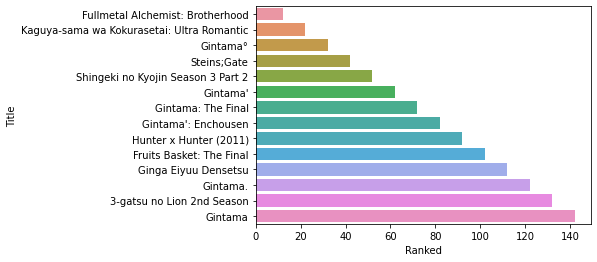

In [63]:
#Visualizando ranking
ranked = anime_game1.loc[anime_game1['Ranked'] <= 150 ]
display(ranked)

sns.barplot(x = "Ranked", y = "Title", data = ranked)
plt.show()



#Nosso campeao de popularidade pelo ranking é ---  Fullmetal Alchemist: Brotherhood

> Bloco com recuo



In [79]:
#full = anime_game1.query('Title == "Fullmetal" ')
full = game[game['Title'].str.contains('Fullmetal')]

display(full.head(100))

,Title,Developer,Producer,Genre,Operating System,Date Released


#Conclusão = Não existe um jogo para o mais popular anime Fullmetal Alchemist, pela analise desses dataframes Anime e Games.

###Outra forma de mostrar os valores usando a biblioteca ploty

In [81]:
import plotly.express as px


df = ranked 
fig = px.bar(df, x="Ranked", y="Title")
fig.show()